In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from functions import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = "../data/Train.csv"
df = pd.read_csv(url)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [3]:
dropcolumns(df, 'Var_1', 'Segmentation', "ID")

In [4]:
df.dropna(inplace = True)

In [5]:
mapeo_gender(df, "Gender")

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,False,No,22,No,Healthcare,1.0,Low,4.0
2,True,Yes,67,Yes,Engineer,1.0,Low,1.0
3,False,Yes,67,Yes,Lawyer,0.0,High,2.0
5,False,Yes,56,No,Artist,0.0,Average,2.0
6,False,No,32,Yes,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,False,Yes,41,Yes,Artist,0.0,High,5.0
8064,False,No,35,No,Executive,3.0,Low,4.0
8065,True,No,33,Yes,Healthcare,1.0,Low,1.0
8066,True,No,27,Yes,Healthcare,1.0,Low,4.0


In [6]:
mapeo(df, "Ever_Married")
mapeo(df, "Graduated")

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,False,False,22,False,Healthcare,1.0,Low,4.0
2,True,True,67,True,Engineer,1.0,Low,1.0
3,False,True,67,True,Lawyer,0.0,High,2.0
5,False,True,56,False,Artist,0.0,Average,2.0
6,False,False,32,True,Healthcare,1.0,Low,3.0
...,...,...,...,...,...,...,...,...
8062,False,True,41,True,Artist,0.0,High,5.0
8064,False,False,35,False,Executive,3.0,Low,4.0
8065,True,False,33,True,Healthcare,1.0,Low,1.0
8066,True,False,27,True,Healthcare,1.0,Low,4.0


In [7]:
df.head(3)

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,False,False,22,False,Healthcare,1.0,Low,4.0
2,True,True,67,True,Engineer,1.0,Low,1.0
3,False,True,67,True,Lawyer,0.0,High,2.0


In [8]:
df_dummies = pd.get_dummies(df, columns=["Profession"])
df_dummies.head(3)

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing
0,False,False,22,False,1.0,Low,4.0,False,False,False,False,False,True,False,False,False
2,True,True,67,True,1.0,Low,1.0,False,False,True,False,False,False,False,False,False
3,False,True,67,True,0.0,High,2.0,False,False,False,False,False,False,False,True,False


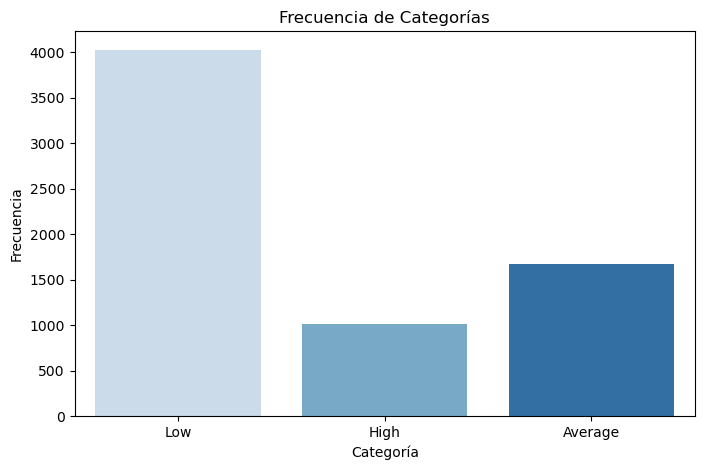

In [9]:
# Gráfico de barras para ver la distribución de nuestra variable
bar_plot(df_dummies, 'Spending_Score')

In [10]:
features = df_dummies.drop('Spending_Score', axis=1)
target = df_dummies['Spending_Score']
features.to_csv('../data/features.csv', index=False)
target.to_csv('../data/target.csv', index=False)

In [11]:
# Matriz de correlación
correlacion(features)

## Prueba de distintos modelos

In [12]:
df_results = pd.read_csv("../data/model_comparison_results.csv")
df_results

,Model,Outliers,Scaling,Feature Set,Accuracy
0,Logistic Regression,With Outliers,No Scaling,All Features,0.797619
1,Decision Tree,With Outliers,No Scaling,All Features,0.753720
2,Random Forest,With Outliers,No Scaling,All Features,0.774554
3,SVM,With Outliers,No Scaling,All Features,0.680804
4,KNN,With Outliers,No Scaling,All Features,0.735863
...,...,...,...,...,...
115,Logistic Regression,Without Outliers,Normalization,No Family Size,0.744537
116,Decision Tree,Without Outliers,Normalization,No Family Size,0.713640
117,Random Forest,Without Outliers,Normalization,No Family Size,0.724190
118,SVM,Without Outliers,Normalization,No Family Size,0.745290


## Gráficos

In [14]:
df_predicciones = pd.read_csv("../data/df_predicciones.csv")

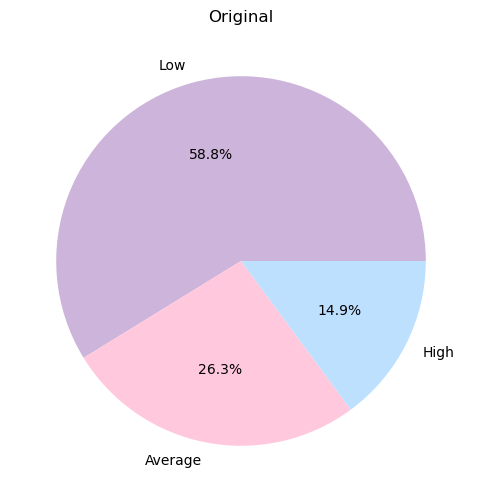

In [15]:
graficos(df_predicciones, "Original")  

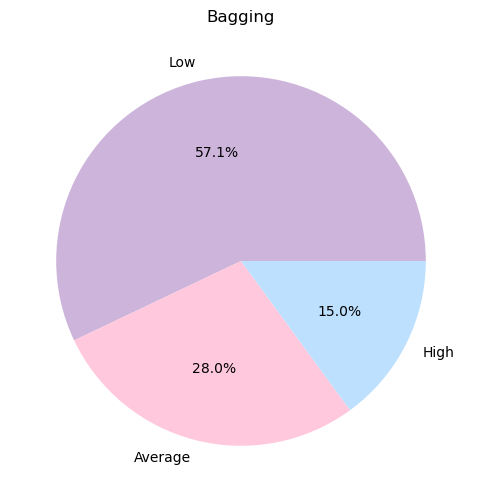

In [16]:
graficos(df_predicciones, "Bagging")

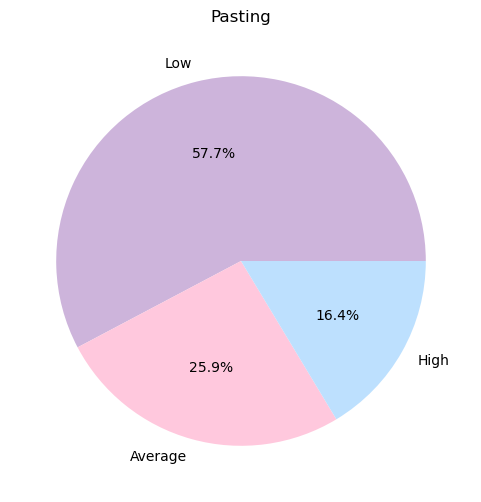

In [17]:
graficos(df_predicciones, "Pasting")  

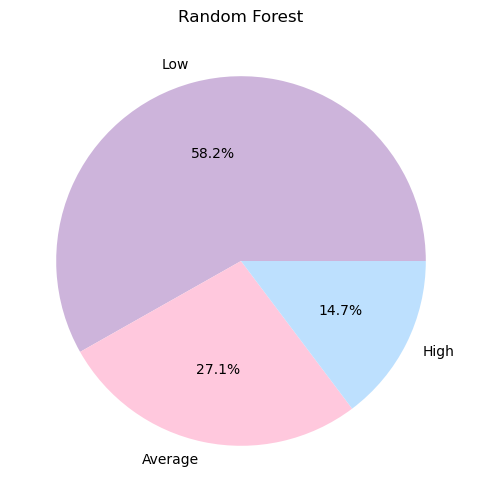

In [18]:
graficos(df_predicciones, "Random Forest")  

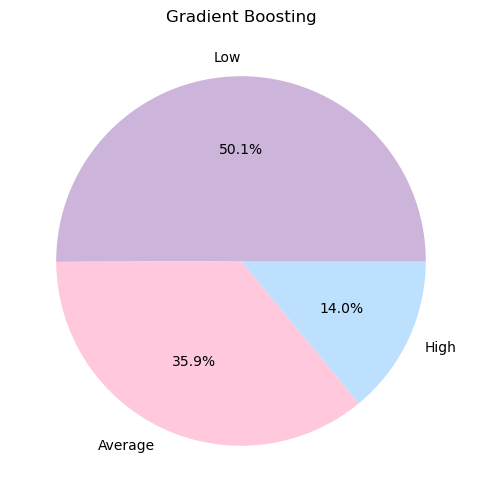

In [19]:
graficos(df_predicciones, "Gradient Boosting")  

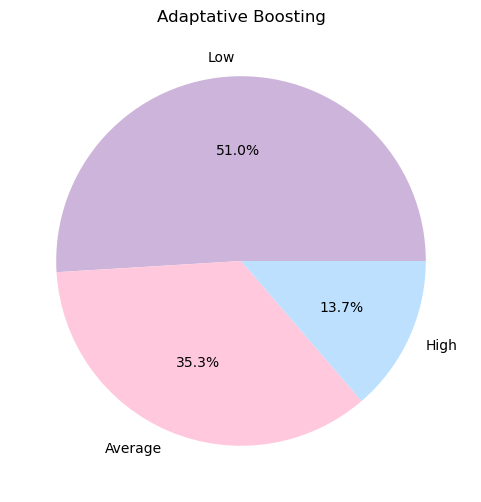

In [20]:
graficos(df_predicciones, "Adaptative Boosting")  